In [10]:
import os
import pickle
os.chdir('/home/users/alexno/sleep-staging')

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# sns.set_style('white')
sns.set_theme(style='whitegrid')


# %matplotlib inline
#MY SETUP FOR MATPLOTLIB
# def setup_mpl():
#     mpl.rc('font', size=7)
#     mpl.rcParams['legend.fontsize'] = 'small'
#     mpl.rcParams['legend.fontsize'] = 'small'
#     mpl.rcParams['xtick.labelsize'] = 'small'
#     mpl.rcParams['ytick.labelsize'] = 'small'
#     mpl.rcParams['font.family']='Helvetica 55 Roman'
#     mpl.rcParams['lines.linewidth'] = 1
#     mpl.rcParams['xtick.major.width'] = 2/3.
#     mpl.rcParams['ytick.major.width'] = 2/3.
#     mpl.rcParams['xtick.minor.width'] = 2/3.
#     mpl.rcParams['ytick.minor.width'] = 2/3.
#     mpl.rcParams['xtick.major.size'] = 3
#     mpl.rcParams['ytick.major.size'] = 3
#     mpl.rcParams['xtick.minor.size'] = 1.5
#     mpl.rcParams['ytick.minor.size'] = 1.5
#     mpl.rcParams['axes.linewidth'] = 2/3.
#     mpl.rcParams['ytick.direction'] = 'in'
#     mpl.rcParams['xtick.direction'] = 'in'
#     mpl.rcParams['xtick.top']=True
#     mpl.rcParams['ytick.right']=True
#     mpl.rcParams['mathtext.default']='regular'
#     mpl.rcParams['xtick.major.pad']='2.3'
#     mpl.rcParams['ytick.major.pad']='2.3'
#     mpl.rcParams['axes.labelpad']= 2
#     mpl.rcParams['figure.dpi'] = 400
#     mpl.rcParams['svg.fonttype'] = "none"
#     alpha = 0.6
#     to_rgba = mpl.colors.ColorConverter().to_rgba
# setup_mpl()

,FileID,SubjectID,Window,Case,Accuracy,Balanced accuracy,Kappa,F1,Precision,Recall,...,Support - N2,F1 - N3,Precision - N3,Recall - N3,Support - N3,F1 - REM,Precision - REM,Recall - REM,Support - REM,Kernel width
0,A0001_5 180135.h5,A0001_5 180135,1 s,all,0.683525,0.630810,0.563429,0.477369,0.497884,0.504648,...,21240.0,0.000000,0.000000,0.000000,0.0,0.614484,0.464684,0.906813,8220.0,5
1,A0028_5 163131.h5,A0028_5 163131,1 s,all,0.705737,0.676673,0.603214,0.601990,0.597372,0.676673,...,23220.0,0.424284,0.292575,0.771667,1200.0,0.780162,0.700669,0.880000,13800.0,5
2,A0049_7 181030.h5,A0049_7 181030,1 s,all,0.626181,0.662843,0.499149,0.587926,0.574074,0.662843,...,32250.0,0.493204,0.385683,0.683846,3900.0,0.690497,0.545817,0.939542,9180.0,5
3,A0119_3 051910.h5,A0119_3 051910,1 s,all,0.668420,0.670736,0.562254,0.593874,0.607313,0.670736,...,22200.0,0.826390,0.786543,0.870489,6540.0,0.402945,0.257946,0.920238,3360.0,5
4,A0148_4 164303.h5,A0148_4 164303,1 s,all,0.448878,0.624625,0.241483,0.366826,0.384975,0.624625,...,44220.0,0.061821,0.031979,0.925000,240.0,0.469971,0.342868,0.746825,5040.0,5


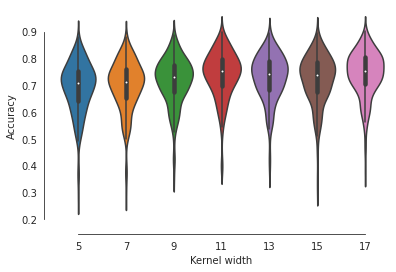

In [2]:
df_list = [
    (5, './experiments/massc/kw5/20201112_135059'),
    (7, './experiments/massc/kw7/20201112_134951'),
    (9, './experiments/massc/kw9/20201112_134951'),
    (11, './experiments/massc/kw11/20201112_145223'),
    (13, './experiments/massc/kw13/20201113_130623'),
    (15, './experiments/massc/kw15/20201112_145045'),
    (17, './experiments/massc/kw17/20201113_125807'),
]

df = []
cm = []
for kernel_width, f in df_list:
    df_ = pd.read_csv(os.path.join(f, 'eval_results.csv'), index_col=0)
    df_['Kernel width'] = kernel_width
    df.append(df_)
df = pd.concat(df, ignore_index=True).reset_index(drop=True)
display(df.head())
sns.violinplot(x='Kernel width', y='Accuracy', data=df.query('Window == "30 s"'))
sns.despine(offset=10, trim=True)


,FileID,SubjectID,Window,Case,Accuracy,Balanced accuracy,Kappa,F1,Precision,Recall,...,Support - N2,F1 - N3,Precision - N3,Recall - N3,Support - N3,F1 - REM,Precision - REM,Recall - REM,Support - REM,Kernel width
0,A0001_5 180135.h5,A0001_5 180135,1 s,all,0.701259,0.638663,0.585007,0.496029,0.508569,0.510930,...,21240.0,0.000000,0.000000,0.000000,0.0,0.680847,0.555958,0.878102,8220.0,~3
1,A0028_5 163131.h5,A0028_5 163131,1 s,all,0.706316,0.668471,0.600130,0.591247,0.583741,0.668471,...,23220.0,0.376265,0.246939,0.790000,1200.0,0.775978,0.760900,0.791667,13800.0,~3
2,A0049_7 181030.h5,A0049_7 181030,1 s,all,0.648163,0.647708,0.513625,0.598749,0.586842,0.647708,...,32250.0,0.457909,0.352851,0.652051,3900.0,0.717978,0.690797,0.747386,9180.0,~3
3,A0119_3 051910.h5,A0119_3 051910,1 s,all,0.683723,0.670652,0.573153,0.610807,0.601122,0.670652,...,22200.0,0.781671,0.725180,0.847706,6540.0,0.485386,0.347318,0.805655,3360.0,~3
4,A0148_4 164303.h5,A0148_4 164303,1 s,all,0.480508,0.601931,0.253456,0.370324,0.381128,0.601931,...,44220.0,0.060022,0.031051,0.895833,240.0,0.438054,0.356396,0.568254,5040.0,~3


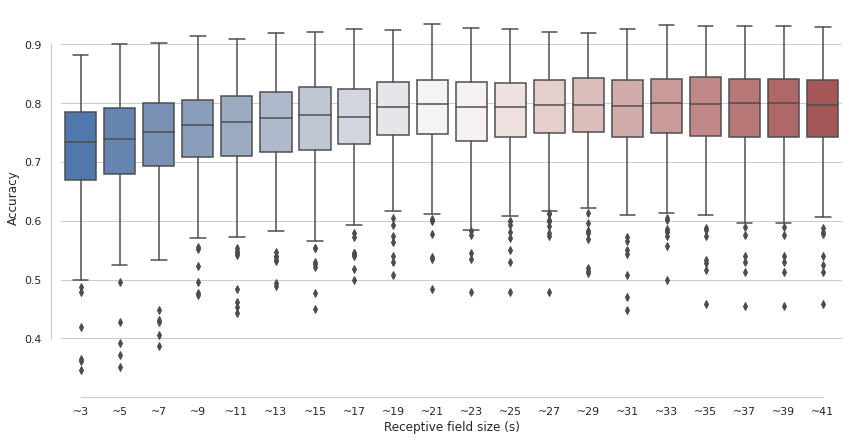

In [14]:
df_list = [
    ('~3', './experiments/massc/kw3/20201114_001956'),
    ('~5', './experiments/massc/kw5/20201112_135059'),
    ('~7', './experiments/massc/kw7/20201112_134951'),
    ('~9', './experiments/massc/kw9/20201112_134951'),
    ('~11', './experiments/massc/kw11/20201112_145223'),
    ('~13', './experiments/massc/kw13/20201113_130623'),
    ('~15', './experiments/massc/kw15/20201112_145045'),
    ('~17', './experiments/massc/kw17/20201113_125807'),
    ('~19', './experiments/massc/kw19/20201120_072840'),
    ('~21', './experiments/massc/kw21/20201119_072314'),
    ('~23', './experiments/massc/kw23/20201121_060956'),
    ('~25', './experiments/massc/kw25/20201121_061018'),
    ('~27', './experiments/massc/kw27/20201121_072454'),
    ('~29', './experiments/massc/kw29/20201121_072425'),
    ('~31', './experiments/massc/kw31/20201124_065129'),
    ('~33', './experiments/massc/kw33/20201123_030125'),
    ('~35', './experiments/massc/kw35/20201121_061018'),
    ('~37', './experiments/massc/kw37/20201123_030125'),
    ('~39', './experiments/massc/kw39/20201123_030130'),
    ('~41', './experiments/massc/kw41/20201123_092604'),
]

df = []
cm = []
for kernel_width, f in df_list:
    df_ = pd.read_csv(os.path.join(f, 'SSC-WSC_eval_results.csv'), index_col=0)
    df_['Kernel width'] = kernel_width
    df.append(df_)
df = pd.concat(df, ignore_index=True).reset_index(drop=True)
display(df.head())
f, ax = plt.subplots(figsize=(14, 7))
sns.boxplot(x='Kernel width', y='Accuracy', data=df.query('Window == "30 s"'), palette='vlag')
sns.despine(offset=10, trim=True)
plt.xlabel('Receptive field size (s)')
f.savefig('results/kernel_width.png', dpi=300, bbox_inches='tight', pad_inches=0)

,Kernel width,Acc
0,~3 s,0.720799
1,~5 s,0.726608
2,~7 s,0.735896
3,~9 s,0.753478
4,~11 s,0.754980
5,~13 s,0.762105
6,~15 s,0.766091
7,~17 s,0.768183
8,~19 s,0.784525
9,~21 s,0.787369


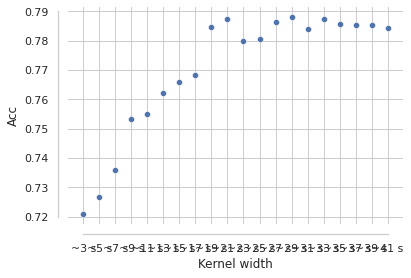

In [12]:
eval_window = 30
case = 'all'
kernel_width = []
acc = []
for kw, f in df_list:
    try:
        with open(os.path.join(f, 'SSC-WSC_eval_confusionmatrix.pkl'), 'rb') as pkl:
            cm = pickle.load(pkl)['confusiomatrix_total']
    except:
        with open(os.path.join(f, 'SSC-WSC_eval_confusionmatrix.pkl'), 'rb') as pkl:
            cm = pickle.load(pkl)['confusionmatrix_total']
    # with open(os.path.join(f, 'eval_confusionmatrix.pkl'), 'rb') as pkl:
    #     cm = pickle.load(pkl)['confusionmatrix_total']
    N = cm[eval_window][case].sum()
    acc.append(np.diag(cm[eval_window][case]).sum() / N)
    kernel_width.append(kw)

df_acc = pd.DataFrame({'Kernel width': kernel_width, 'Acc': acc})
display(df_acc)

sns.scatterplot(x='Kernel width', y='Acc', data=df_acc)
plt.xticks(ticks=df_acc['Kernel width'].unique())
sns.despine(offset=10, trim=True)

,Kernel width,Acc
0,~3,0.720799
1,~5,0.726608
2,~7,0.735896
3,~9,0.753478
4,~11,0.754980
5,~13,0.762105
6,~15,0.766091
7,~17,0.768183
8,~19,0.784525
9,~21,0.787369


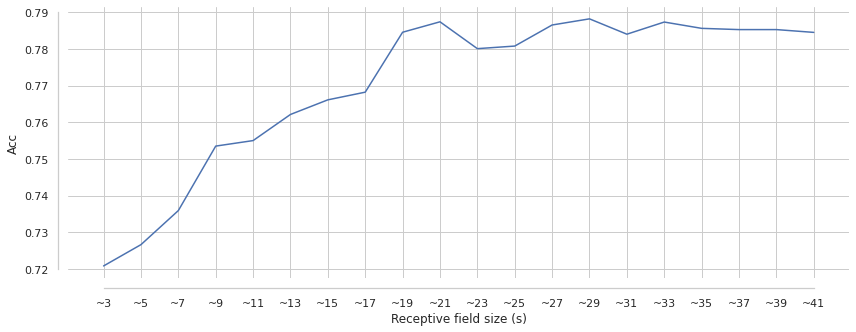

In [15]:
eval_window = 30
case = 'all'
kernel_width = []
acc = []
for kw, f in df_list:
    try:
        with open(os.path.join(f, 'SSC-WSC_eval_confusionmatrix.pkl'), 'rb') as pkl:
            cm = pickle.load(pkl)['confusiomatrix_total']
    except:
        with open(os.path.join(f, 'SSC-WSC_eval_confusionmatrix.pkl'), 'rb') as pkl:
            cm = pickle.load(pkl)['confusionmatrix_total']
    # with open(os.path.join(f, 'eval_confusionmatrix.pkl'), 'rb') as pkl:
    #     cm = pickle.load(pkl)['confusionmatrix_total']
    N = cm[eval_window][case].sum()
    acc.append(np.diag(cm[eval_window][case]).sum() / N)
    kernel_width.append(kw)

df_acc = pd.DataFrame({'Kernel width': kernel_width, 'Acc': acc})
display(df_acc)

f, ax = plt.subplots(figsize=(14, 5))
sns.lineplot(x='Kernel width', y='Acc', data=df_acc)
plt.xticks(ticks=df_acc['Kernel width'].unique())
plt.xlabel('Receptive field size (s)')
sns.despine(offset=10, trim=True)
f.savefig('results/kernel_width_group.png', dpi=300, bbox_inches='tight', pad_inches=0)